# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Set up the initial lists 
city = []
latitude = []
longitude = []
temperature = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []


In [4]:
#open weather url
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# the number of sets needed in the for loop
num_sets = (len(cities) // 50) + 1


print('Beginning Data Retrieval')
print('-----------------------------')

for set_counter in range(num_sets):
    
    try:    
        
        for record_counter in range(50):
            
            counter = set_counter * 50 + record_counter
            print(f'Processing Record {record_counter + 1} of Set {set_counter + 1} | {cities[counter]}')


            try:
    
                query_url = url + "&q=" + cities[counter]
                weather_json = requests.get(query_url).json()
                
                latitude.append(weather_json["coord"]["lat"])
                longitude.append(weather_json["coord"]["lon"])
                temperature.append(weather_json["main"]["temp_max"])
                humidity.append(weather_json["main"]["humidity"])
                cloudiness.append(weather_json["clouds"]["all"])
                wind_speed.append(weather_json["wind"]["speed"])
                country.append(weather_json["sys"]["country"])
                date.append(weather_json["dt"])
                city.append(cities[counter])
                
                time.sleep(1)
                
            except KeyError:

                print('City not found. Skipping...')

    
    except IndexError:
        
        break
        

print('-----------------------------')
print('Data Retrieval Complete')      
print('-----------------------------')


Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 2 of Set 1 | kruisfontein
Processing Record 3 of Set 1 | saint george
Processing Record 4 of Set 1 | inderborskiy
City not found. Skipping...
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | hilo
Processing Record 7 of Set 1 | avarua
Processing Record 8 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 9 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 10 of Set 1 | aklavik
Processing Record 11 of Set 1 | mataura
Processing Record 12 of Set 1 | meulaboh
Processing Record 13 of Set 1 | ilulissat
Processing Record 14 of Set 1 | umzimvubu
City not found. Skipping...
Processing Record 15 of Set 1 | cape town
Processing Record 16 of Set 1 | ballina
Processing Record 17 of Set 1 | senneterre
Processing Record 18 of Set 1 | new norfolk
Processing Record 19 of Set 1 | rosetta
Processing R

Processing Record 35 of Set 4 | tezu
Processing Record 36 of Set 4 | moncao
Processing Record 37 of Set 4 | lasa
Processing Record 38 of Set 4 | guican
Processing Record 39 of Set 4 | singaraja
Processing Record 40 of Set 4 | gari
Processing Record 41 of Set 4 | kibala
Processing Record 42 of Set 4 | bandarbeyla
Processing Record 43 of Set 4 | zomin
Processing Record 44 of Set 4 | yellowknife
Processing Record 45 of Set 4 | saint-philippe
Processing Record 46 of Set 4 | ayan
Processing Record 47 of Set 4 | burica
City not found. Skipping...
Processing Record 48 of Set 4 | fortuna
Processing Record 49 of Set 4 | ostrovnoy
Processing Record 50 of Set 4 | luanda
Processing Record 1 of Set 5 | dauriya
Processing Record 2 of Set 5 | san patricio
Processing Record 3 of Set 5 | san isidro
Processing Record 4 of Set 5 | samarai
Processing Record 5 of Set 5 | liverpool
Processing Record 6 of Set 5 | erenhot
Processing Record 7 of Set 5 | mwene-ditu
Processing Record 8 of Set 5 | husavik
Process

Processing Record 25 of Set 8 | piney green
Processing Record 26 of Set 8 | chom bung
City not found. Skipping...
Processing Record 27 of Set 8 | utiroa
City not found. Skipping...
Processing Record 28 of Set 8 | grindavik
Processing Record 29 of Set 8 | umm jarr
City not found. Skipping...
Processing Record 30 of Set 8 | rantepao
Processing Record 31 of Set 8 | bara
Processing Record 32 of Set 8 | aleysk
Processing Record 33 of Set 8 | vila velha
Processing Record 34 of Set 8 | amapa
Processing Record 35 of Set 8 | miracema do tocantins
Processing Record 36 of Set 8 | santa maria
Processing Record 37 of Set 8 | bad sackingen
Processing Record 38 of Set 8 | kikwit
Processing Record 39 of Set 8 | usinsk
Processing Record 40 of Set 8 | luau
Processing Record 41 of Set 8 | rubtsovsk
Processing Record 42 of Set 8 | bonthe
Processing Record 43 of Set 8 | tsihombe
City not found. Skipping...
Processing Record 44 of Set 8 | turtkul
City not found. Skipping...
Processing Record 45 of Set 8 | k

Processing Record 10 of Set 12 | yebaishou
Processing Record 11 of Set 12 | salamiyah
Processing Record 12 of Set 12 | kawana waters
City not found. Skipping...
Processing Record 13 of Set 12 | acari
Processing Record 14 of Set 12 | shimizu
Processing Record 15 of Set 12 | laguna
Processing Record 16 of Set 12 | viligili
City not found. Skipping...
Processing Record 17 of Set 12 | petaling jaya
Processing Record 18 of Set 12 | bac giang
Processing Record 19 of Set 12 | wajir
Processing Record 20 of Set 12 | korla
Processing Record 21 of Set 12 | beyneu
Processing Record 22 of Set 12 | mandali
Processing Record 23 of Set 12 | gat
Processing Record 24 of Set 12 | saint pete beach
Processing Record 25 of Set 12 | bilma
Processing Record 26 of Set 12 | aranos
Processing Record 27 of Set 12 | fianga
City not found. Skipping...
Processing Record 28 of Set 12 | chilca
Processing Record 29 of Set 12 | vilhena
Processing Record 30 of Set 12 | muroto
Processing Record 31 of Set 12 | te anau
Proc

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Create the city data into a .csv
cities_dict = {'City': city,'Latitude' : latitude,
               'Longitude' : longitude,'Max Temperature (°F)': temperature,
               'Humidity (%)': humidity,'Cloudiness (%)': cloudiness,
               'Wind Speed (MPH)': wind_speed,'Country': country,'Date': date}

cities_df = pd.DataFrame(cities_dict)

csv_path = 'output_data/cities.csv'

cities_df.to_csv(csv_path)

#Cities_df dataframe
cities_df

,City,Latitude,Longitude,Max Temperature (°F),Humidity (%),Cloudiness (%),Wind Speed (MPH),Country,Date
0,kruisfontein,-34.0033,24.7314,62.01,87,69,1.99,ZA,1612752759
1,saint george,37.1041,-113.5841,57.20,17,1,6.91,US,1612752661
2,ushuaia,-54.8000,-68.3000,50.00,81,75,4.61,AR,1612752756
3,hilo,19.7297,-155.0900,77.00,61,75,8.05,US,1612752782
4,avarua,-21.2078,-159.7750,84.20,74,20,10.36,CK,1612752783
...,...,...,...,...,...,...,...,...,...
555,port hawkesbury,45.6169,-61.3485,25.00,93,90,13.80,CA,1612753419
556,malanje,-9.5402,16.3410,63.93,97,100,7.05,AO,1612753420
557,camopi,3.1655,-52.3158,72.07,98,100,2.01,GF,1612753421
558,sunndalsora,62.6754,8.5515,19.40,68,90,4.61,NO,1612753422


In [6]:
# Describe a statistics of the cities_df
cities_df.describe()

,Latitude,Longitude,Max Temperature (°F),Humidity (%),Cloudiness (%),Wind Speed (MPH),Date
count,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,5.600000e+02
mean,20.835747,15.607238,47.551661,74.237500,50.725000,8.342857,1.612753e+09
std,33.861393,92.259412,32.519302,18.333299,40.406425,6.125401,2.056316e+02
min,-54.800000,-179.166700,-36.400000,1.000000,0.000000,0.430000,1.612753e+09
25%,-7.464675,-64.890650,25.000000,66.000000,2.000000,3.755000,1.612753e+09
50%,26.258300,18.966450,57.990000,78.000000,48.500000,6.910000,1.612753e+09
75%,49.986725,100.340125,74.610000,87.000000,91.250000,11.180000,1.612753e+09
max,78.218600,179.316700,91.990000,100.000000,100.000000,42.570000,1.612753e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
# Removing the cities where the humidity > 100% 

cleaned_cities_df = cities_df.loc[cities_df['Humidity (%)'] <= 100]

cleaned_cities_df

,City,Latitude,Longitude,Max Temperature (°F),Humidity (%),Cloudiness (%),Wind Speed (MPH),Country,Date
0,kruisfontein,-34.0033,24.7314,62.01,87,69,1.99,ZA,1612752759
1,saint george,37.1041,-113.5841,57.20,17,1,6.91,US,1612752661
2,ushuaia,-54.8000,-68.3000,50.00,81,75,4.61,AR,1612752756
3,hilo,19.7297,-155.0900,77.00,61,75,8.05,US,1612752782
4,avarua,-21.2078,-159.7750,84.20,74,20,10.36,CK,1612752783
...,...,...,...,...,...,...,...,...,...
555,port hawkesbury,45.6169,-61.3485,25.00,93,90,13.80,CA,1612753419
556,malanje,-9.5402,16.3410,63.93,97,100,7.05,AO,1612753420
557,camopi,3.1655,-52.3158,72.07,98,100,2.01,GF,1612753421
558,sunndalsora,62.6754,8.5515,19.40,68,90,4.61,NO,1612753422


In [8]:
#  Get the indices of cities that have humidity over 100%
high_humidity = cities_df[cities_df['Humidity (%)'] > 100].index

high_humidity

Int64Index([], dtype='int64')

In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.

clean_data = cities_df.drop(high_humidity, inplace = False)

clean_data

,City,Latitude,Longitude,Max Temperature (°F),Humidity (%),Cloudiness (%),Wind Speed (MPH),Country,Date
0,kruisfontein,-34.0033,24.7314,62.01,87,69,1.99,ZA,1612752759
1,saint george,37.1041,-113.5841,57.20,17,1,6.91,US,1612752661
2,ushuaia,-54.8000,-68.3000,50.00,81,75,4.61,AR,1612752756
3,hilo,19.7297,-155.0900,77.00,61,75,8.05,US,1612752782
4,avarua,-21.2078,-159.7750,84.20,74,20,10.36,CK,1612752783
...,...,...,...,...,...,...,...,...,...
555,port hawkesbury,45.6169,-61.3485,25.00,93,90,13.80,CA,1612753419
556,malanje,-9.5402,16.3410,63.93,97,100,7.05,AO,1612753420
557,camopi,3.1655,-52.3158,72.07,98,100,2.01,GF,1612753421
558,sunndalsora,62.6754,8.5515,19.40,68,90,4.61,NO,1612753422


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [10]:
from datetime import date

date = date.today()
date_of_analysis = date.strftime("%d/%m/%Y")

date_of_analysis

'07/02/2021'

## Latitude vs. Temperature Plot

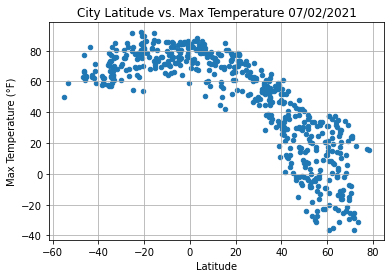

In [11]:
# Show relationship between latitude and max temperature.
cleaned_cities_df.plot(kind='scatter', x='Latitude', y='Max Temperature (°F)',
                       title=f'City Latitude vs. Max Temperature {date_of_analysis}')
plt.grid()
plt.savefig('output_data/Latitude_MaxTemperature_Plot.png')

## Latitude vs. Humidity Plot

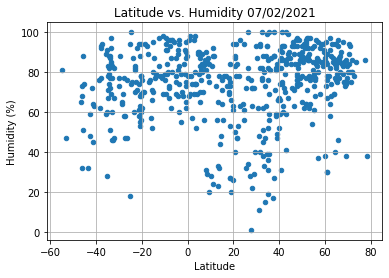

In [12]:
# Plot the scatter plot that shows the relation between latitude and humidity
cleaned_cities_df.plot(kind='scatter', x='Latitude', y='Humidity (%)', 
                       title=f'Latitude vs. Humidity {date_of_analysis}')
plt.grid()
plt.savefig('output_data/Latitude_Humidity_Plot.png')

## Latitude vs. Cloudiness Plot

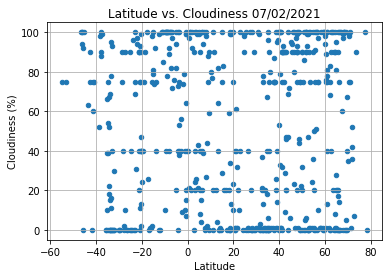

In [13]:
# Plot the scatter plot that shows the relation between latitude and cloudiness
cleaned_cities_df.plot(kind='scatter', x='Latitude', y='Cloudiness (%)', 
                       title=f'Latitude vs. Cloudiness {date_of_analysis}')
plt.grid()
plt.savefig('output_data/Latitude_Cloudiness_Plot.png')

## Latitude vs. Wind Speed Plot

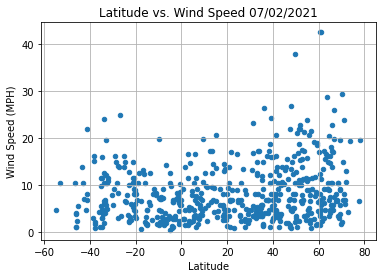

In [14]:
# Plot the scatter plot that shows the relation between latitude and wind speed
cleaned_cities_df.plot(kind='scatter', x='Latitude', y='Wind Speed (MPH)', 
                       title= f'Latitude vs. Wind Speed {date_of_analysis}')
plt.grid()
plt.savefig('output_data/Latitude_WindSpeed_Plot.png')

## Linear Regression

In [15]:
# Split the dataframe into two based on the latitude
north_cities_df = cleaned_cities_df.loc[cleaned_cities_df['Latitude'] >= 0]
south_cities_df = cleaned_cities_df.loc[cleaned_cities_df['Latitude'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7265732079924917


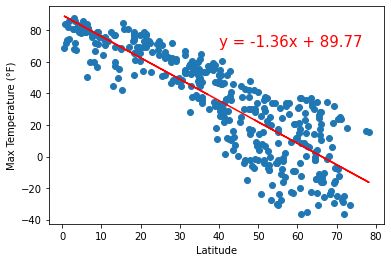

In [16]:
# Plot the linear regression model between latitude and max temperature

x_values = north_cities_df['Latitude']
y_values = north_cities_df['Max Temperature (°F)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,70),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°F)')
print(f"The r-squared is: {rvalue**2}")
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.2597998866337885


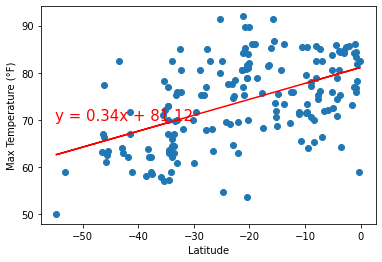

In [17]:
# Plot the linear regression model between latitude and max temperature

x_values = south_cities_df['Latitude']
y_values = south_cities_df['Max Temperature (°F)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,70),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°F)')
print(f"The r-squared is: {rvalue**2}")
plt.show()



####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.05563039339706


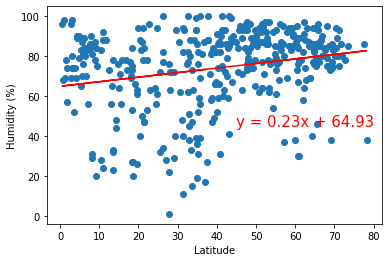

In [18]:
# Plot the linear regression model between latitude and humidity

x_values = north_cities_df['Latitude']
y_values = north_cities_df['Humidity (%)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,45),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-squared is: {rvalue**2}")
plt.show()




####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.1039424476925836


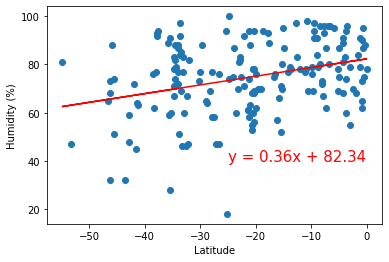

In [19]:
# Plot the linear regression model between latitude and humidity

x_values = south_cities_df['Latitude']
y_values = south_cities_df['Humidity (%)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.006959434069719688


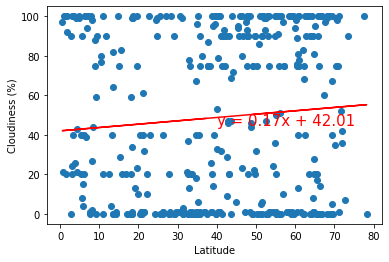

In [20]:
# Plot the linear regression model between latitude and cloudiness

x_values = north_cities_df['Latitude']
y_values = north_cities_df['Cloudiness (%)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,45),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The r-squared is: {rvalue**2}")
plt.show()


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.01907044938036129


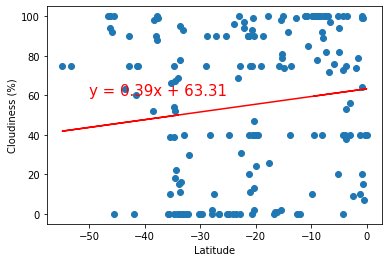

In [21]:
#Plot the linear regression model between latitude and cloudiness

x_values = south_cities_df['Latitude']
y_values = south_cities_df['Cloudiness (%)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,60),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.05316187043995606


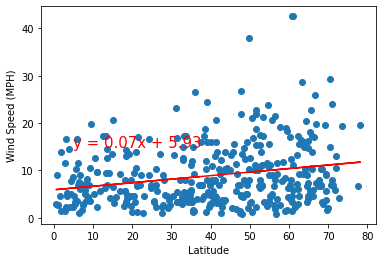

In [22]:
# Plot the linear regression model between latitude and wind speed

x_values = north_cities_df['Latitude']
y_values = north_cities_df['Wind Speed (MPH)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,15),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.03653700695307691


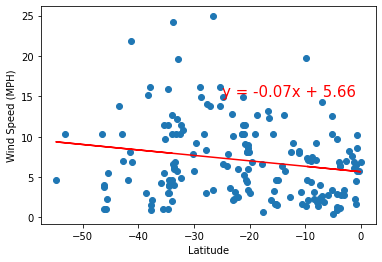

In [23]:
# Plot the linear regression model between latitude and wind speed

x_values = south_cities_df['Latitude']
y_values = south_cities_df['Wind Speed (MPH)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,15),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')
print(f"The r-squared is: {rvalue**2}")
plt.show()